In [1]:
%matplotlib inline

from utils.image_plot import *
import numpy as np
from skimage import exposure
from skimage.color import rgb2gray
from skimage.filter.rank import mean_bilateral
from skimage import img_as_ubyte
from skimage.io import imread, imshow
from skimage.morphology import disk

C:\Anaconda\lib\site-packages\skimage\filter\__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


C:\Anaconda\lib\site-packages\skimage\util\dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


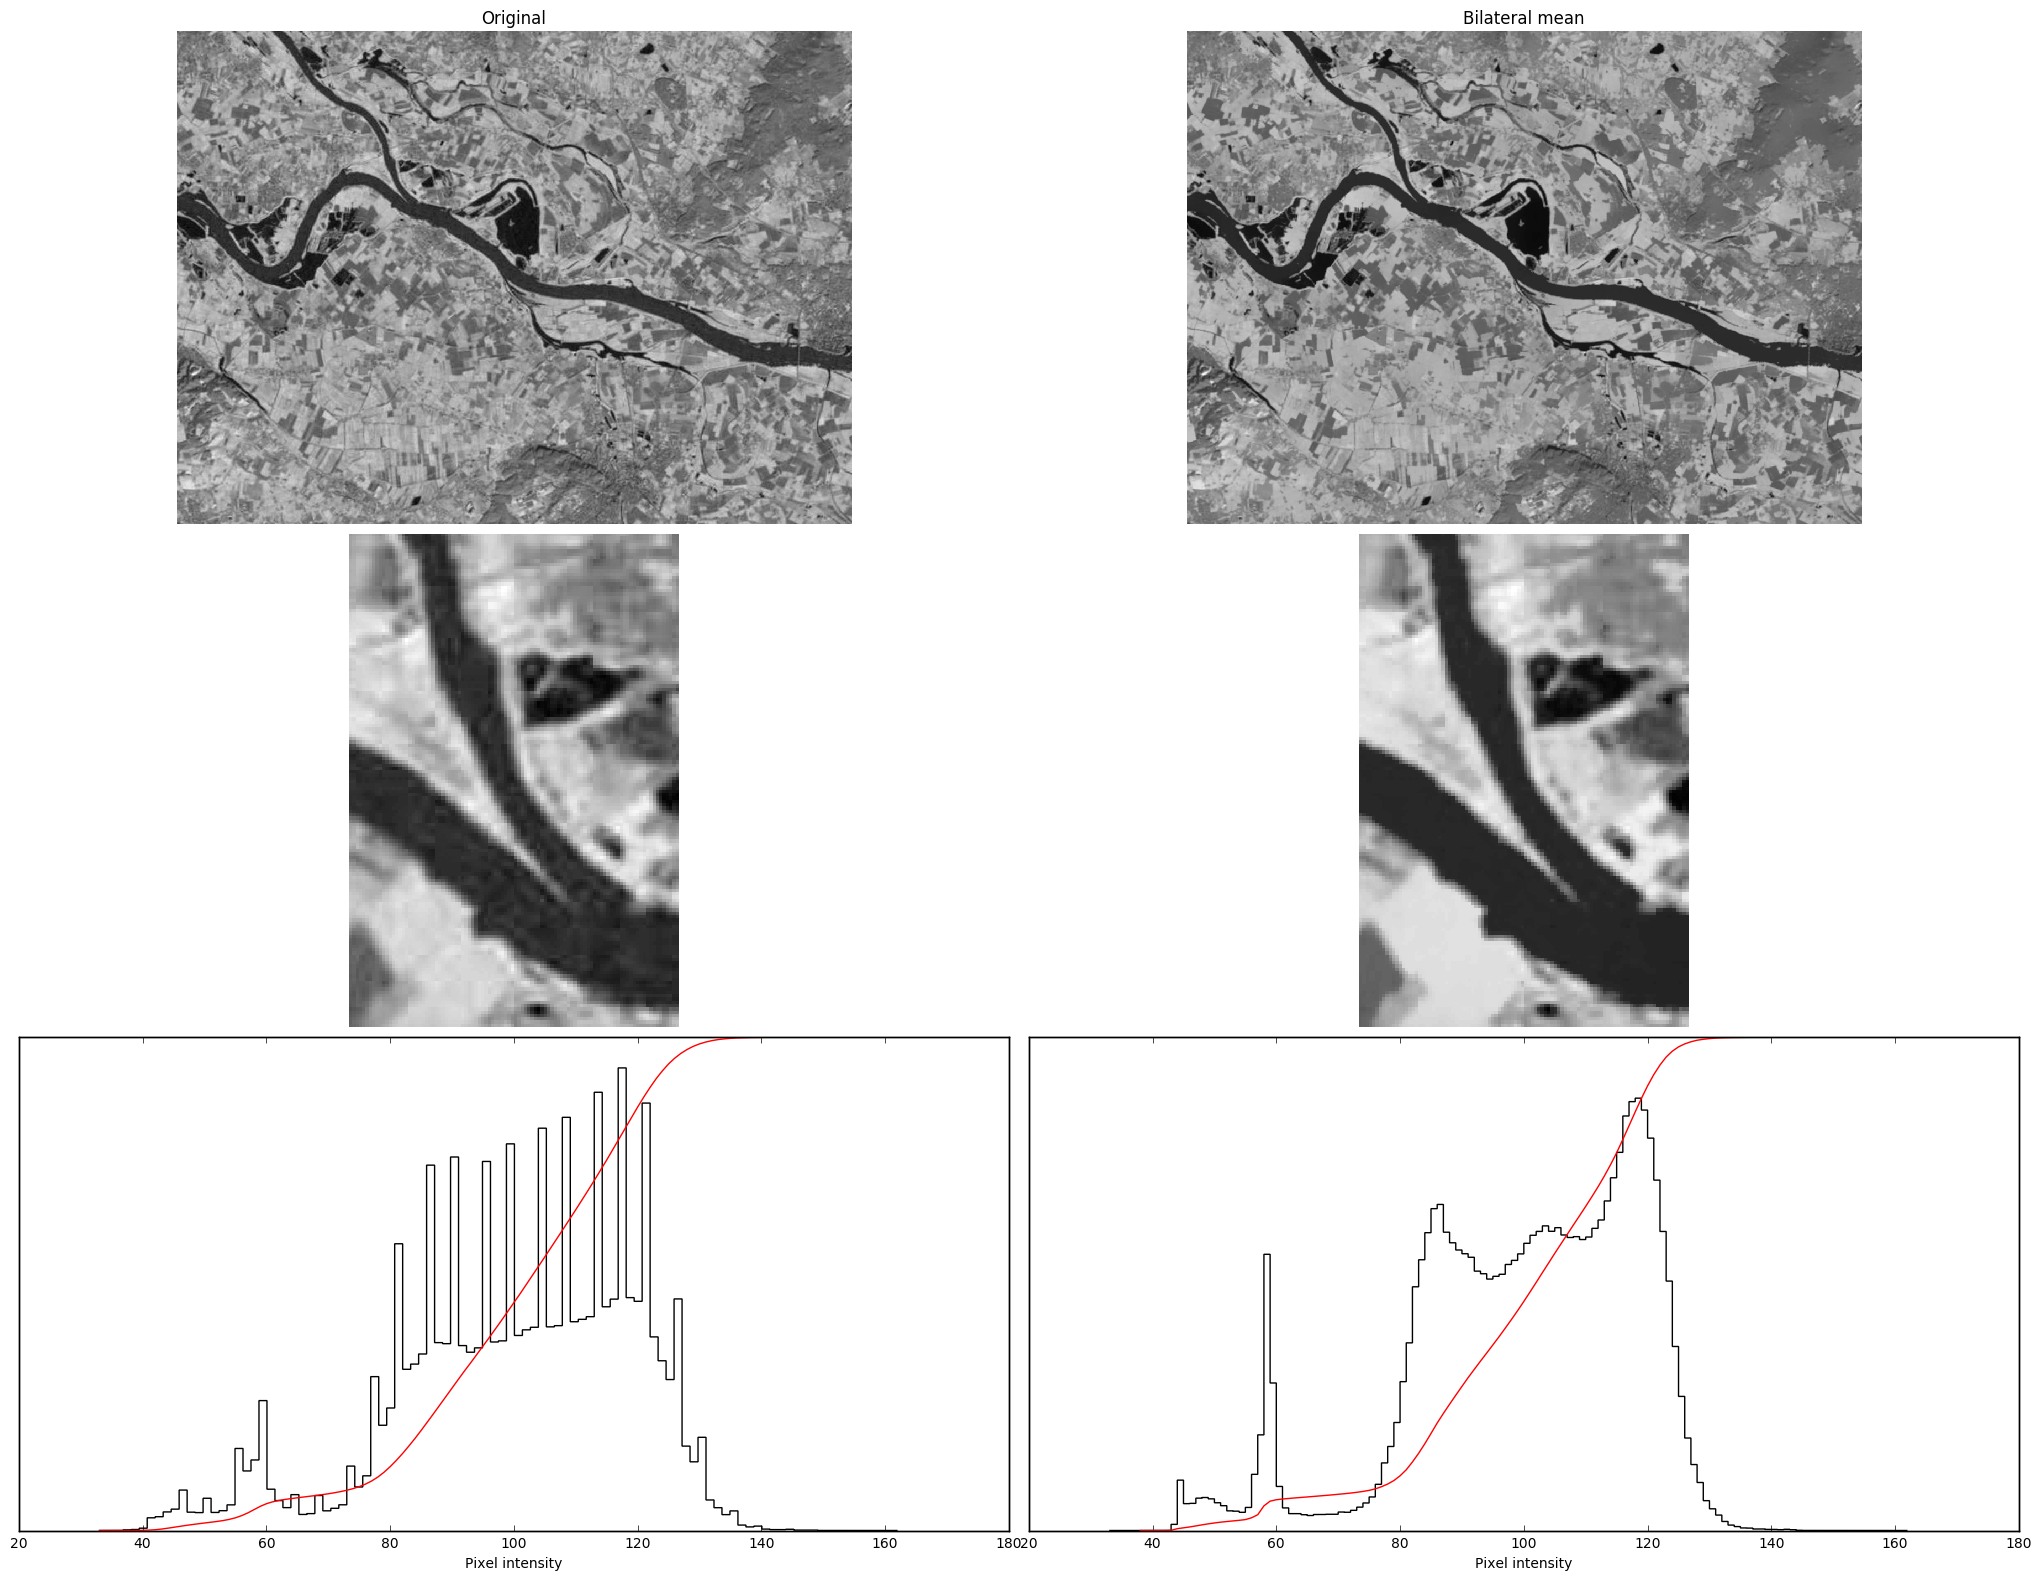

In [2]:
# read RGB image
path = r'data\landsat_1985_0036_021_row0024_path0198.jpg'
im = imread(path)

# get intensity
im_grey = rgb2gray(im)
im_uint = img_as_ubyte(im_grey).astype(np.uint16)

# clean-up using bilateral filter
result = mean_bilateral(im_uint, disk(20), s0=10, s1=10)

show_comparison(im_uint, result, 'Original', 'Bilateral mean', 200, 350, 350, 450, True, True)

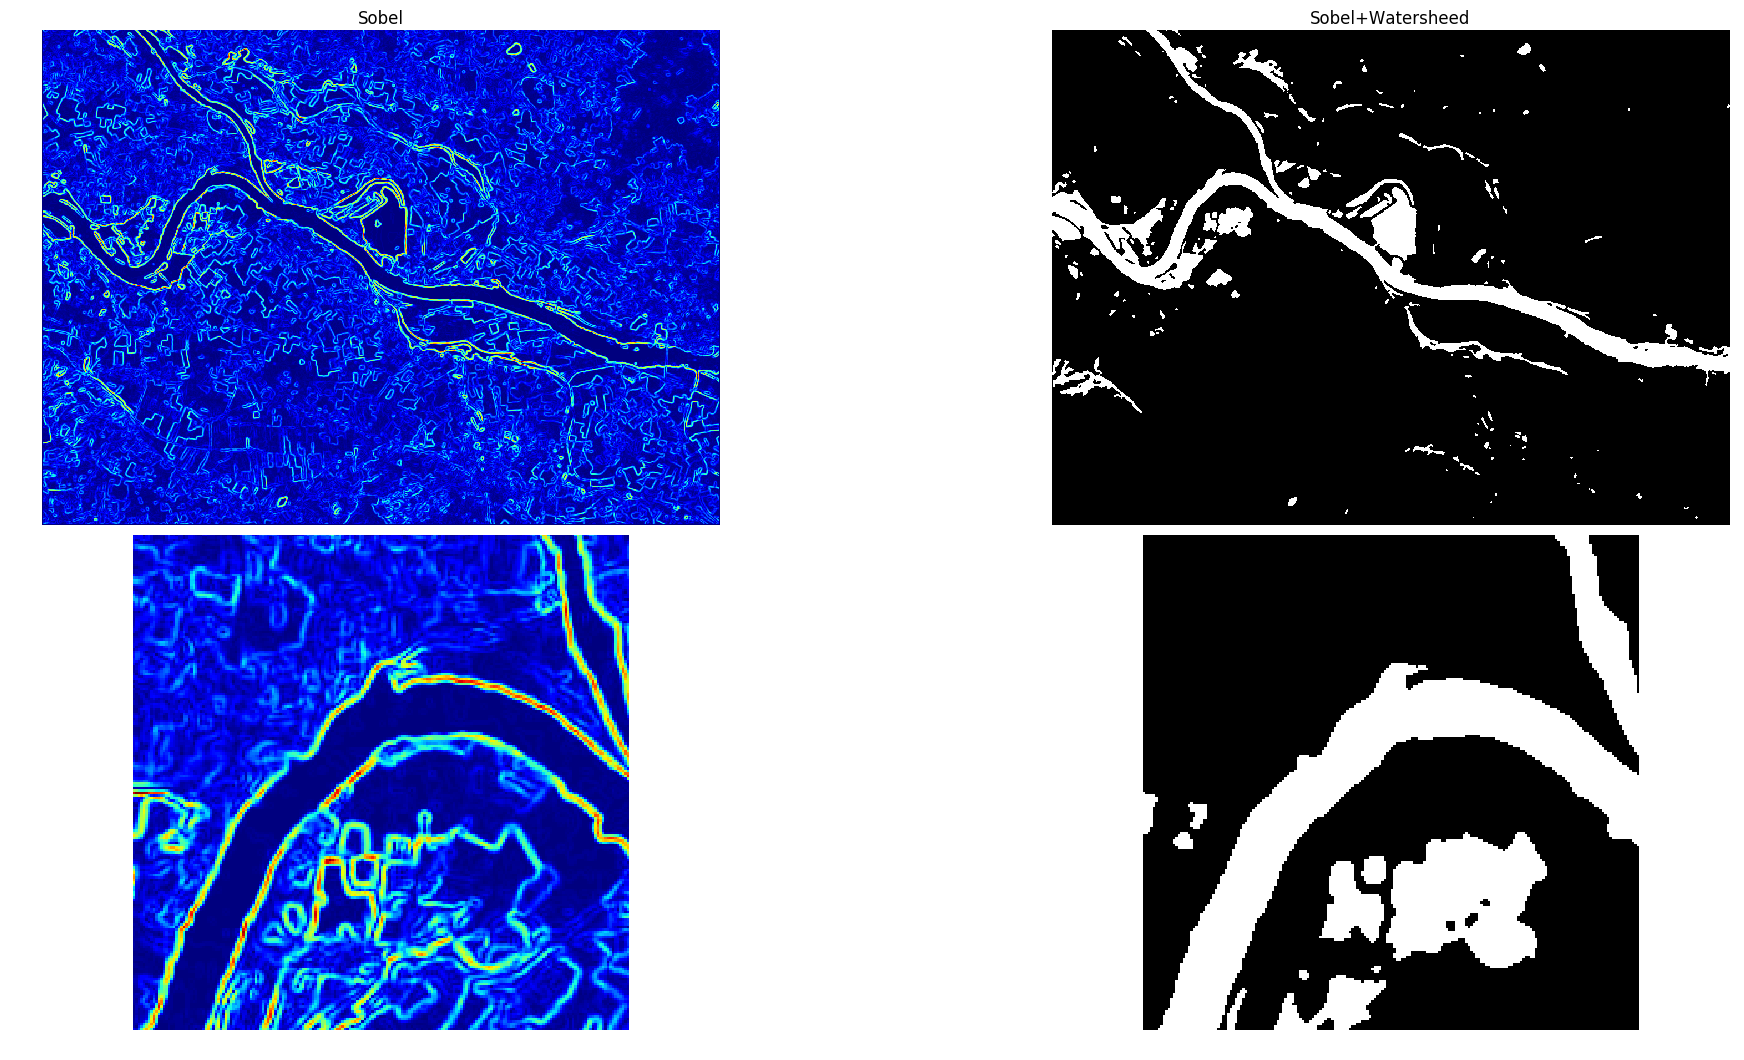

In [3]:
from skimage.filter import sobel
from skimage.morphology import watershed
from scipy import ndimage as nd

result = mean_bilateral(im_uint, disk(20), s0=10, s1=10)

edges = sobel(result)
markers = np.zeros_like(result)
foreground, background = 1, 2

# how to find these parameters, histogram analysis?
markers[result < 65.0] = background
markers[result > 90.0] = foreground

ws = watershed(edges, markers)
seg1 = nd.label(ws == foreground)[0]

show_comparison(edges, ws, 'Sobel', 'Sobel+Watersheed', 200, 400, 200, 400, cmap1=plt.cm.jet)

(-0.5, 1221.5, 893.5, -0.5)

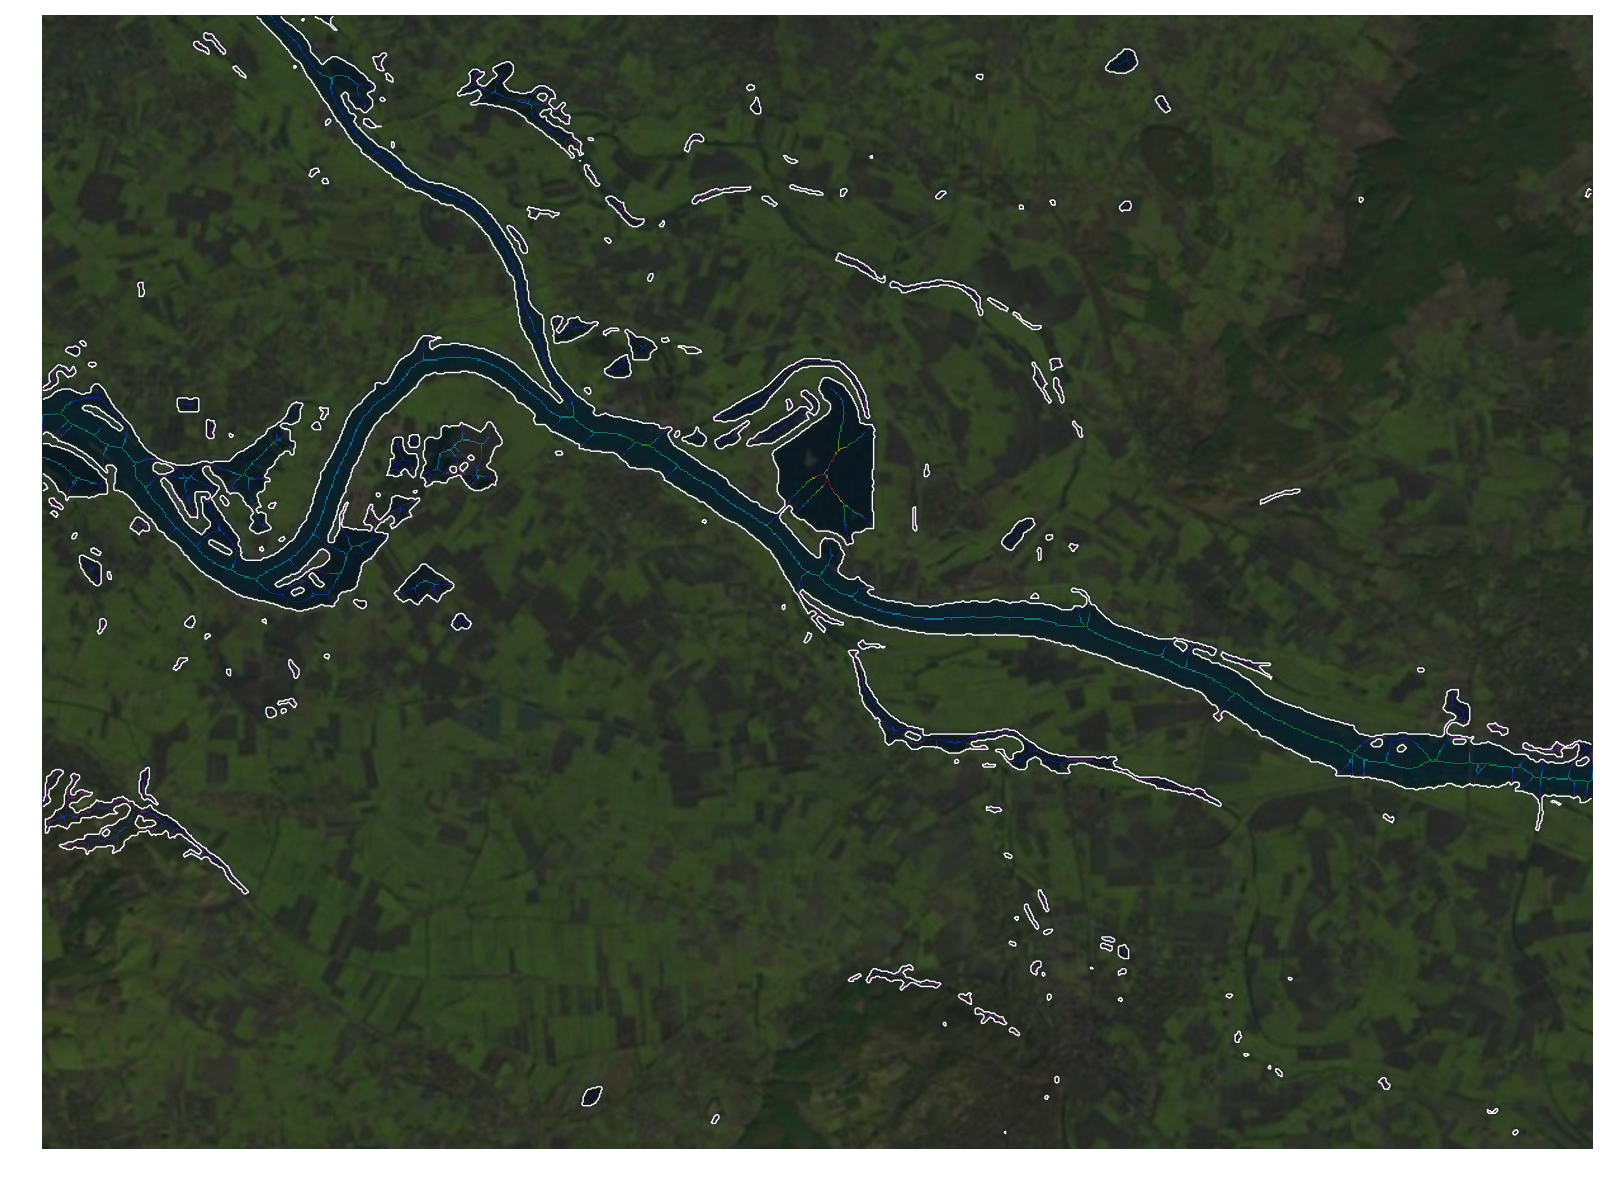

In [4]:
from scipy import ndimage
from skimage.morphology import medial_axis

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(ws == 2, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, ax = plt.subplots(figsize=(20, 15))
ax.imshow(im)
ax.imshow(dist_on_skel, alpha=0.5, cmap=plt.cm.spectral, interpolation='nearest')
ax.contour(ws, [1.999], colors='w')
ax.axis('off')
